<a href="https://colab.research.google.com/github/paulosrl/AnaliseGrafos/blob/main/pivys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import networkx as nx
import numpy as np
import uuid
import pyvis
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import copy
from pyvis.network import Network


In [8]:
def geraGrafo(nodes=50, p=0.5, seed=1, m1=2, m2=1):
    # hard code parameters and use seed to replicate same network each time
    TG = Network(notebook=True, cdn_resources='in_line')
    TG = nx.dual_barabasi_albert_graph(n=nodes, p=p, seed=seed, m1=m1, m2=m2)

    ### append node properties
    # 1. Compute Node Degree
    nx.set_node_attributes(TG, dict(TG.degree()), name='degree')
    # 2. Compute betweenness centrality
    nx.set_node_attributes(TG, nx.betweenness_centrality(TG), name='betweenness_centrality')

    for node, data in TG.nodes(data=True):
        # 3. Simulate node level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

        # 4. Simulate UIDs as node identifiers
        data['node_identifier'] = str(uuid.uuid4())

    ### append edge properties
    for u, v, data in TG.edges(data=True):

        # Simulate edge level features
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)

    return TG


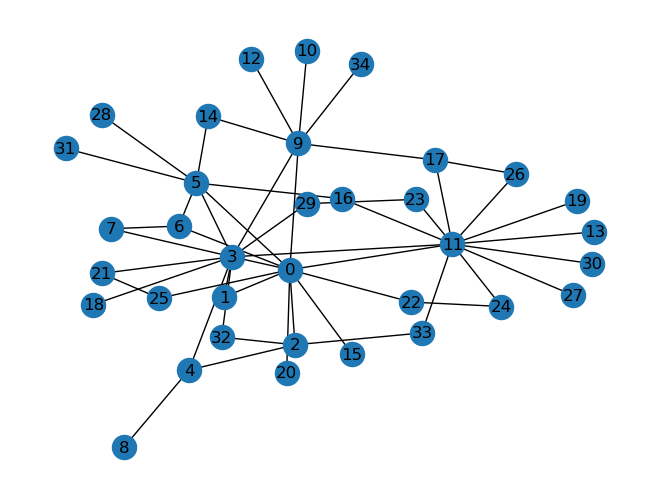

In [11]:
G=geraGrafo(nodes=35)
nx.draw(G, with_labels=True)